In [1]:
import warnings
warnings.filterwarnings("ignore")

from wrangle import wrangle_zillow
import acquire
from prepare import split_data, scale_data
from env import get_db_url

<img src="https://1000logos.net/wp-content/uploads/2017/11/Zillow-Logo.png" title="Zillow Logo"/>

<center><h1><span style="color:#0074E3">Bringing Down the ... Property Tax Value Predictors</span>
</h1>
    <br>by Jennifer Eyring, Jemison Cohort

_________________________________________________________________________________________________________________

 <b>Intro notes:</b>
 In response to the email sent out by the Zillow Data Science team,  I have conducted some thorough research to improve and add-on to the current Zillow property tax value predictor.
<br><br>
<center>This report is a walk-through of the main findings from my data exploration that gives our Zillow Data Science team<br><b> a OLS (Linear) Regression Model that returns a 33% accuracy predicition of what Single Family property tax values are.

_________________________________________________________________________________________________________________

# Project Goals:
><ol>
><li><b>Construct ML Regression model that predicts propery tax assessed values at a higher rate than the current model</b></li>
 <li>To find the key property feature drivers that relate to property value for single family properties.</li>
 <li>To find and add the fipcode state and county names to the 2017 dataframe.</li>
</ol>

# Audience Notes about the Data:
><ol>
    ><li><b>Data source:</b> obtained from MySQL database. <br> <i>To learn more about how & why this data was original collected, visit <a href="https://www.kaggle.com/competitions/zillow-prize-1/overview" title="Wikipedia">Kaggle's Zestimate Challenge.</a></li><br>
 <li><b>Original data count: 54421</b><br> <i>base on transactions made on 2017 Single Family properties.</li><br>
 <li>During data cleaning & prep stage, I made some decisions on narrowing down data by removing outliers:</li><br><i>Finished Squarefoot Range: 200sqft - 9_000sqft<br><i>Bedroom Count range: 1-6bd<br><i>Bathroom Count range:1-6bd<br>Property Tax Value range: 45k - 2.5million</li><br><br>
 <li>Added fips codes:<br><i><b>6037 = Los Angeles county <br><i><b>6059 = Orange county<br><i><b>6111 = Ventura county
</ol>

________________________________________________________________________________________________________

# <center> <u>What drives our Single Family Property Values? </u><br> <i>Exploring the Data

### For this first rendition on a new ML model, l focused on these 5 different property features:

###  <li>Bedroom Count<br><li>Bathroom Count<br><li>Finished Squarefeet<br><li>Year built<br><li>County <br><i>(used fips codes for numeric testings)


In [19]:
#adding those necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pydataset as data

#sklearn tools:: working those models!
from sklearn.model_selection import train_test_split


#calling the dataframe
df = wrangle_zillow()
#prepped and split
train, validate, test = split_data(df)
#scaled data
scale_data(train, validate, test)
train.head(1)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,county
25905,2,1.0,1024,527930,1948.0,6037,Los Angeles County


# <center> Take aways? <br>Buyers like their bathrooms.

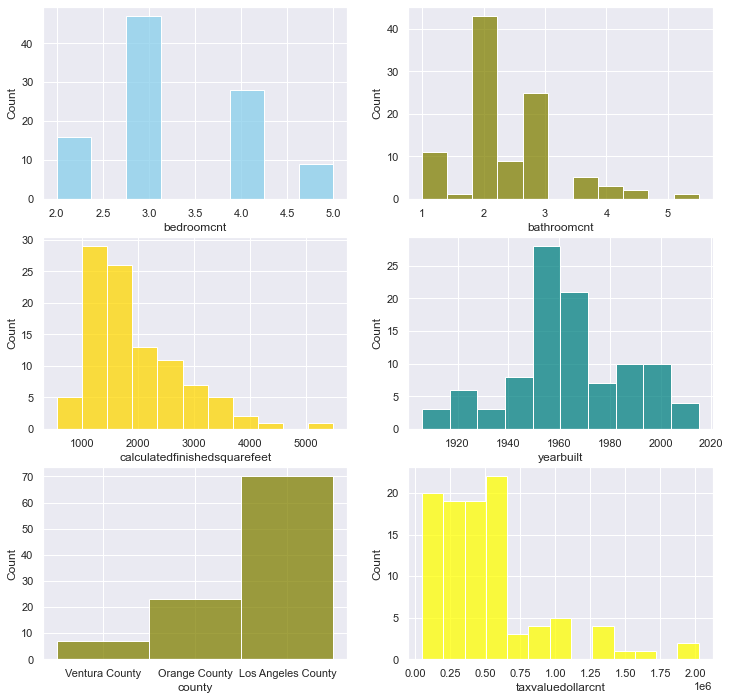

In [50]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(data=train.sample(100), x="bedroomcnt", color="skyblue", ax=axs[0, 0])
sns.histplot(data=train.sample(100), x="bathroomcnt", color="olive", ax=axs[0, 1])
sns.histplot(data=train.sample(100), x="calculatedfinishedsquarefeet", color="gold", ax=axs[1, 0])
sns.histplot(data=train.sample(100), x="yearbuilt",  color="teal", ax=axs[1, 1])
sns.histplot(data=train.sample(100), x="county",  color="olive", ax=axs[2, 0 ])
sns.histplot(data=train.sample(100), x="taxvaluedollarcnt",  color="yellow", ax=axs[2, 1])

plt.show()

### <center> <u>Summary of Exploration:</u><br> <br>Things to notice, but not be fooled by...<br><br>The above chart can give us some insights into what buyers might be looking for when purchasing a Single Family property, however, we have to consider other factors that come into play, and can really only understand that through hypothesis testing.

In [ ]:
-Bedroom and Bathroom count have a close average when it comes to properties sold [bd:3, ba:2.5] however, when conducting correlation hypothesis tests on these features, 
    <br>I found that though both bedroom count and bathroom count did reject the null H_0: bedroom/bathroom count are not linearly dependant on the property value

<img src="https://play-lh.googleusercontent.com/dKL38bnxOQTTyG9dB467IfCYF0gHWZROJeDUiSGEuVrjaSIHbjDr9T6P6y1OrB_KAQ" title="house" width="100" height="40"/>